## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Importing dataset

In [ ]:
data = pd.read_csv('exporting.csv')
data

/tmp/ipython-input-3024073360.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('exporting.csv')


,Patient ID,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Surg Prim Site (1998+),Survival months,Vital status recode (study cutoff used),Histologic Type ICD-O-3,Age recode with single ages and 90+,Year of death recode,Grade Pathological (2018+)
0,661,2018,Male,White,Yes,None/Unknown,33,0047,Alive,8140,66 years,Alive at last contact,3
1,1405,2020,Female,White,No/Unknown,None/Unknown,0,0012,Dead,8140,66 years,2021,9
2,1459,2018,Male,Asian or Pacific Islander,No/Unknown,None/Unknown,33,0047,Alive,8140,88 years,Alive at last contact,9
3,1863,2020,Female,White,No/Unknown,Beam radiation,0,0016,Alive,8070,58 years,Alive at last contact,9
4,2393,2019,Male,Black,Yes,None/Unknown,0,0005,Dead,8144,68 years,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144859,63367837,2018,Female,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,77 years,2021,9
144860,63368051,2018,Female,Black,No/Unknown,None/Unknown,99,Unknown,Dead,8000,74 years,2021,9
144861,63368357,2020,Male,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,89 years,2021,9
144862,63368377,2020,Male,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,89 years,2021,9


In [ ]:
data.shape

(144864, 13)

In [ ]:
data.sample(5)

,Patient ID,Year of diagnosis,Sex,"Race recode (W, B, AI, API)","Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Surg Prim Site (1998+),Survival months,Vital status recode (study cutoff used),Histologic Type ICD-O-3,Age recode with single ages and 90+,Year of death recode,Grade Pathological (2018+)
51936,27830958,2018,Female,Black,Yes,None/Unknown,0,0038,Alive,8253,54 years,Alive at last contact,9
77008,36933948,2019,Female,Black,No/Unknown,None/Unknown,33,0031,Alive,8480,69 years,Alive at last contact,9
87973,46671955,2018,Female,White,Yes,Beam radiation,0,0037,Alive,8041,58 years,Alive at last contact,9
12313,5969988,2020,Male,White,No/Unknown,None/Unknown,21,0012,Alive,8140,66 years,Alive at last contact,3
95938,47118086,2019,Male,White,No/Unknown,None/Unknown,0,0000,Dead,8070,65 years,2019,9


In [ ]:
data.rename(columns={'Histologic Type ICD-O-3': 'cancer_type','Race recode (W, B, AI, API)':'Race','Chemotherapy recode (yes, no/unk)':'Chemotherapy','Radiation recode':'Radiation','RX Summ--Surg Prim Site (1998+)':'Surgery type','Vital status recode (study cutoff used)':'Vital Status','Age recode with single ages and 90+':'Age','Grade Pathological (2018+)':'Grade'}, inplace=True)

In [ ]:
data

,Patient ID,Year of diagnosis,Sex,Race,Chemotherapy,Radiation,Surgery type,Survival months,Vital Status,cancer_type,Age,Year of death recode,Grade
0,661,2018,Male,White,Yes,None/Unknown,33,0047,Alive,8140,66 years,Alive at last contact,3
1,1405,2020,Female,White,No/Unknown,None/Unknown,0,0012,Dead,8140,66 years,2021,9
2,1459,2018,Male,Asian or Pacific Islander,No/Unknown,None/Unknown,33,0047,Alive,8140,88 years,Alive at last contact,9
3,1863,2020,Female,White,No/Unknown,Beam radiation,0,0016,Alive,8070,58 years,Alive at last contact,9
4,2393,2019,Male,Black,Yes,None/Unknown,0,0005,Dead,8144,68 years,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144859,63367837,2018,Female,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,77 years,2021,9
144860,63368051,2018,Female,Black,No/Unknown,None/Unknown,99,Unknown,Dead,8000,74 years,2021,9
144861,63368357,2020,Male,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,89 years,2021,9
144862,63368377,2020,Male,White,No/Unknown,None/Unknown,99,Unknown,Dead,8000,89 years,2021,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144864 entries, 0 to 144863
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Patient ID            144864 non-null  int64 
 1   Year of diagnosis     144864 non-null  int64 
 2   Sex                   144864 non-null  object
 3   Race                  144864 non-null  object
 4   Chemotherapy          144864 non-null  object
 5   Radiation             144864 non-null  object
 6   Surgery type          144864 non-null  int64 
 7   Survival months       144864 non-null  object
 8   Vital Status          144864 non-null  object
 9   cancer_type           144864 non-null  int64 
 10  Age                   144864 non-null  object
 11  Year of death recode  144864 non-null  object
 12  Grade                 144864 non-null  object
dtypes: int64(4), object(9)
memory usage: 14.4+ MB


In [ ]:
data.describe(include='all')

,Patient ID,Year of diagnosis,Sex,Race,Chemotherapy,Radiation,Surgery type,Survival months,Vital Status,cancer_type,Age,Year of death recode,Grade
count,1.448640e+05,144864.000000,144864,144864,144864,144864,144864.000000,144864,144864,144864.000000,144864,144864,144864
unique,NaN,NaN,2,5,2,8,NaN,49,2,NaN,88,5,13
top,NaN,NaN,Male,White,No/Unknown,None/Unknown,NaN,0000,Dead,NaN,71 years,Alive at last contact,9
freq,NaN,NaN,73451,116483,91152,86985,NaN,14223,89091,NaN,5650,55773,107970
mean,3.542437e+07,2018.970593,NaN,NaN,NaN,NaN,9.499655,NaN,NaN,8127.260506,NaN,NaN,NaN
std,1.858199e+07,0.806619,NaN,NaN,NaN,NaN,20.637901,NaN,NaN,131.708171,NaN,NaN,NaN
min,6.610000e+02,2018.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,8000.000000,NaN,NaN,NaN
25%,2.020423e+07,2018.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,8041.000000,NaN,NaN,NaN
50%,3.682824e+07,2019.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,8140.000000,NaN,NaN,NaN
75%,5.032243e+07,2020.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,8140.000000,NaN,NaN,NaN


In [ ]:
for columns in data :
    print(data[columns].value_counts())

Patient ID
11275300    4
55766912    4
54937411    4
16775793    4
62061628    4
           ..
27750355    1
27750347    1
27750342    1
27750335    1
63368379    1
Name: count, Length: 142214, dtype: int64
Year of diagnosis
2019    50486
2018    49319
2020    45059
Name: count, dtype: int64
Sex
Male      73451
Female    71413
Name: count, dtype: int64
Race
White                            116483
Black                             15605
Asian or Pacific Islander         11155
American Indian/Alaska Native       945
Unknown                             676
Name: count, dtype: int64
Chemotherapy
No/Unknown    91152
Yes           53712
Name: count, dtype: int64
Radiation
None/Unknown                                             86985
Beam radiation                                           53657
Refused (1988+)                                           3070
Recommended, unknown if administered                       818
Radiation, NOS  method or source not specified             173
Radioactiv

In [ ]:
data['Age'] = data['Age'].astype(str).str.extract(r'(\d+)').astype(float)

#### Handling Missing Values

In [ ]:
data.replace({'Survival months': {'Unknown': np.nan}}, inplace=True)
data.replace({'Race': {'Unknown': np.nan}}, inplace=True)

In [ ]:
data.isnull().mean()*100

,0
Patient ID,0.000000
Year of diagnosis,0.000000
Sex,0.000000
Race,0.466645
Chemotherapy,0.000000
Radiation,0.000000
Surgery type,0.000000
Survival months,2.679755
Vital Status,0.000000
cancer_type,0.000000


In [ ]:
data = data.dropna(subset=['Survival months'])
data=  data.dropna(subset=['Race'])
data

,Patient ID,Year of diagnosis,Sex,Race,Chemotherapy,Radiation,Surgery type,Survival months,Vital Status,cancer_type,Age,Year of death recode,Grade
0,661,2018,Male,White,Yes,None/Unknown,33,0047,Alive,8140,66.0,Alive at last contact,3
1,1405,2020,Female,White,No/Unknown,None/Unknown,0,0012,Dead,8140,66.0,2021,9
2,1459,2018,Male,Asian or Pacific Islander,No/Unknown,None/Unknown,33,0047,Alive,8140,88.0,Alive at last contact,9
3,1863,2020,Female,White,No/Unknown,Beam radiation,0,0016,Alive,8070,58.0,Alive at last contact,9
4,2393,2019,Male,Black,Yes,None/Unknown,0,0005,Dead,8144,68.0,2019,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
144854,63365547,2019,Male,Black,No/Unknown,None/Unknown,0,0015,Dead,8000,58.0,2021,9
144855,63365570,2019,Male,White,Yes,None/Unknown,0,0024,Alive,8140,56.0,Alive at last contact,9
144856,63365809,2020,Female,White,No/Unknown,None/Unknown,0,0003,Dead,8000,89.0,2021,9
144857,63367263,2020,Male,Black,No/Unknown,None/Unknown,0,0000,Alive,8041,61.0,Alive at last contact,9


### Data preprocessing

In [ ]:
# Standardize Chemotherapy column
data['Chemotherapy'] = data['Chemotherapy'].replace({
    'No/Unknown': 'No',
    'Yes': 'Yes'
})


In [ ]:
# Group cancer types with fewer than 100 occurrences
counts = data['cancer_type'].value_counts()
rare_cancers = counts[counts < 100].index
data['cancer_type_grouped'] = data['cancer_type'].replace(rare_cancers, 'Other')

In [ ]:
# Group grade
data=data.copy()
def map_grade(grade):
    grade = str(grade).strip().upper()
    if grade in ['I', '1', 'GRADE I', 'WELL DIFFERENTIATED']:
        return 'A'
    elif grade in ['II', '2', 'GRADE II', 'MODERATELY DIFFERENTIATED']:
        return 'B'
    elif grade in ['III', '3', 'GRADE III', 'POORLY DIFFERENTIATED']:
        return 'C'
    elif grade in ['IV', '4', 'GRADE IV', 'UNDIFFERENTIATED']:
        return 'D'
    else:
        return 'Other'

data['grade_grouped'] = data['Grade'].apply(map_grade)


In [ ]:
# Group Radiation
def simplify_radiation(x):
    if x == 'Beam radiation':
        return 'Beam'
    elif x in ['Refused (1988+)', 'Recommended, unknown if administered']:
        return 'Refused/Unknown'
    elif x in [
        'Radiation, NOS  method or source not specified',
        'Radioactive implants (includes brachytherapy) (1988+)',
        'Radioisotopes (1988+)',
        'Combination of beam with implants or isotopes'
    ]:
        return 'Other'
    else:
        return 'None/Unknown'

data['radiation_grouped'] = data['Radiation'].apply(simplify_radiation)


### Exploratory Data Analysis(EDA)

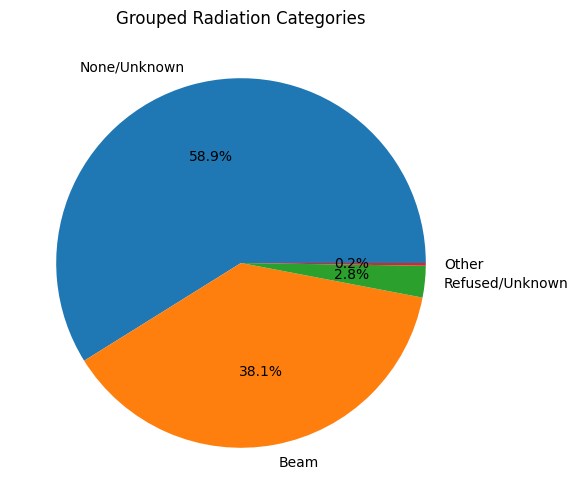

In [ ]:
data['radiation_grouped'].value_counts(normalize=True).plot(kind='pie' ,
    figsize=(6,6), autopct='%1.1f%%',
    ylabel='',
    title='Grouped Radiation Categories'
)
plt.show()


##### About 38.1% people done beam radiation

<Axes: ylabel='count'>

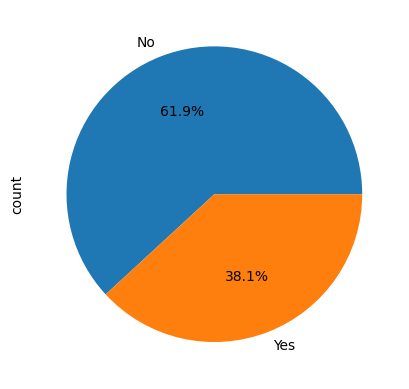

In [ ]:
data['Chemotherapy'].value_counts().plot(kind='pie',autopct='%1.1f%%')

##### About 38.1% people took chemotherapy

<Axes: ylabel='count'>

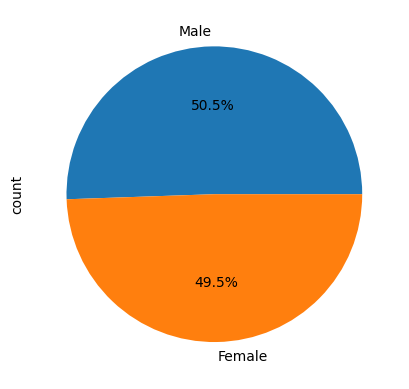

In [ ]:
data['Sex'].value_counts().plot(kind='pie',autopct='%1.1f%%')

#### The cancer cases in male are 50.5% and female is 49.5%

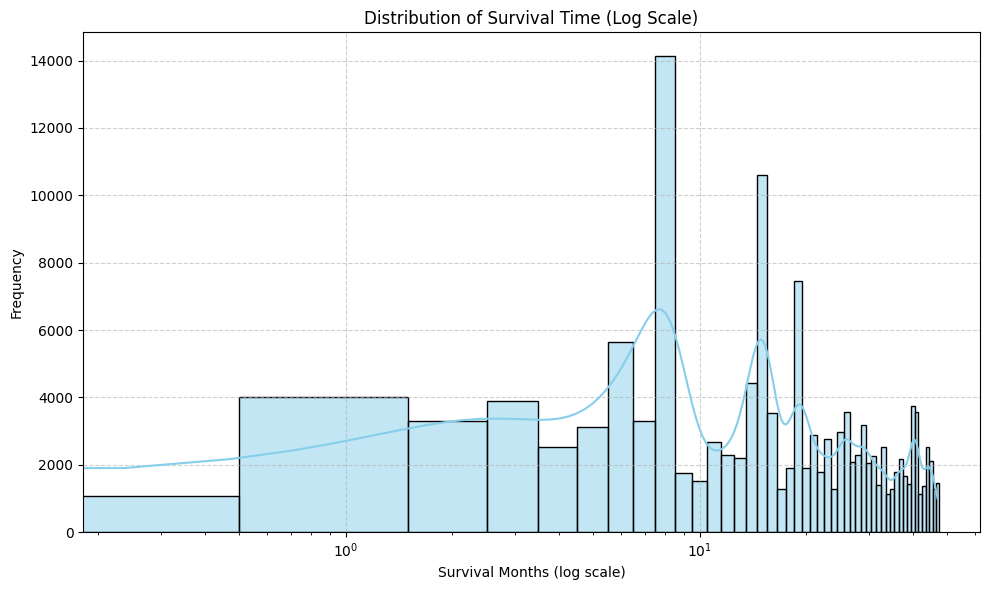

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(data['Survival months'].dropna(), kde=True, bins=30, color='skyblue', edgecolor='black')
plt.xscale('log')
plt.title("Distribution of Survival Time (Log Scale)")
plt.xlabel("Survival Months (log scale)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


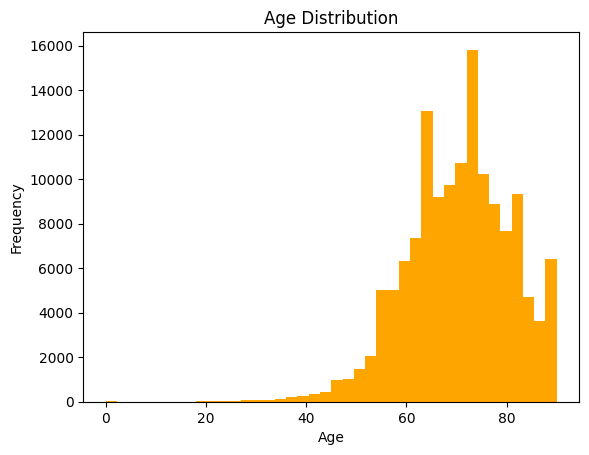

In [ ]:
# Age distribution

data['Age'].dropna().plot.hist(bins=40, color='orange', title='Age Distribution')
plt.xlabel('Age')
plt.show()

Race       American Indian/Alaska Native  Asian or Pacific Islander  Black  \
age_group                                                                    
0-19                                   0                          1      8   
20-39                                  5                        111    115   
40-59                                125                       1777   2744   
60-79                                632                       6565  10371   
80-119                               149                       2443   1969   

Race       White  
age_group         
0-19          44  
20-39        509  
40-59      14786  
60-79      74785  
80-119     23194  


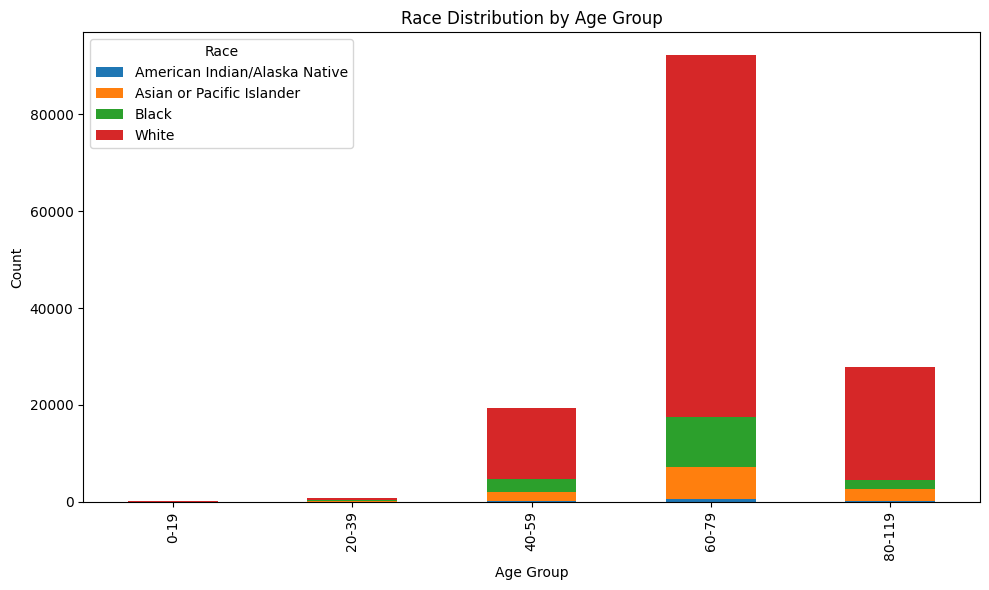

In [ ]:

data = data.dropna(subset=['Age', 'Race'])

bins = [0, 20, 40, 60, 80, 120]
labels = ['0-19', '20-39', '40-59', '60-79', '80-119']
data['age_group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

ct = pd.crosstab(data['age_group'], data['Race'])
print(ct)  # Check the output before plotting

if not ct.empty:
    ct.plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title("Race Distribution by Age Group")
    plt.xlabel("Age Group")
    plt.ylabel("Count")
    plt.legend(title='Race')
    plt.tight_layout()
    plt.show()
else:
    print("Crosstab is empty. Check if Age and Race columns are valid.")


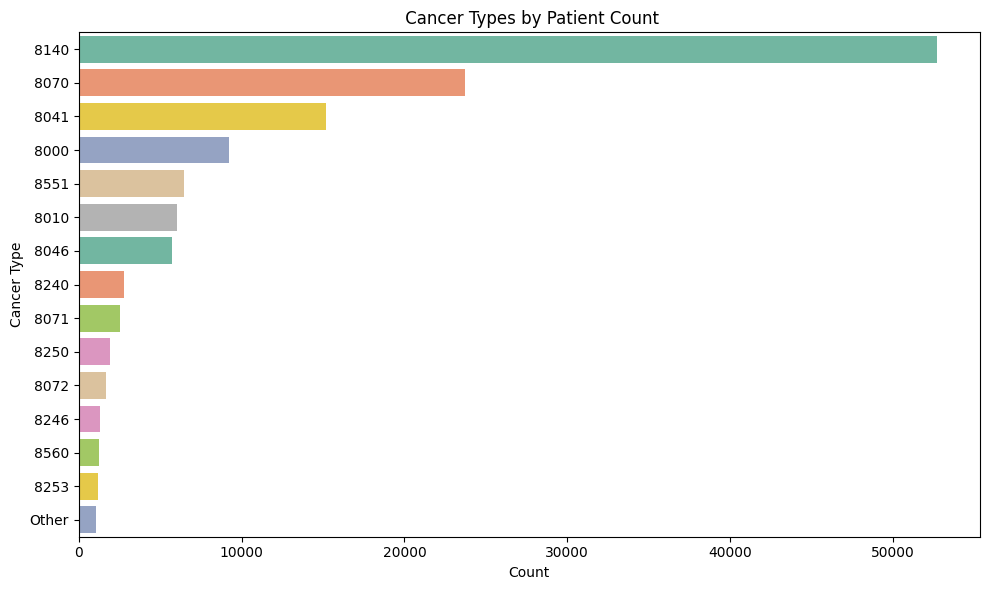

In [ ]:
top_n = 15
top_cancers = data['cancer_type_grouped'].value_counts().nlargest(top_n).index

plt.figure(figsize=(10, 6))
sns.countplot(
    y='cancer_type_grouped',
    hue='cancer_type_grouped',
    data=data[data['cancer_type_grouped'].isin(top_cancers)],
    order=top_cancers,
    palette='Set2',
    legend=False
)
plt.title(f' Cancer Types by Patient Count')
plt.xlabel('Count')
plt.ylabel('Cancer Type')
plt.tight_layout()
plt.show()


#### Most people suffer with type 8140,8070,8041 cancers

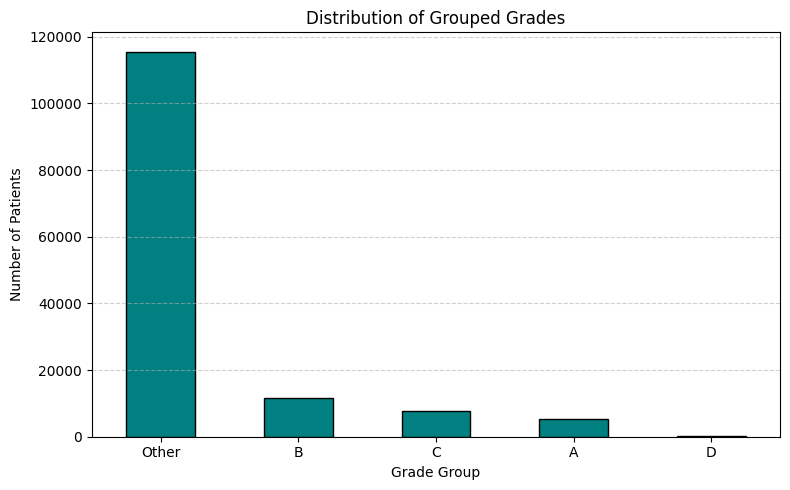

In [ ]:


plt.figure(figsize=(8, 5))
data['grade_grouped'].value_counts().plot(
    kind='bar',
    color='teal',
    edgecolor='black'
)
plt.title('Distribution of Grouped Grades')
plt.xlabel('Grade Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

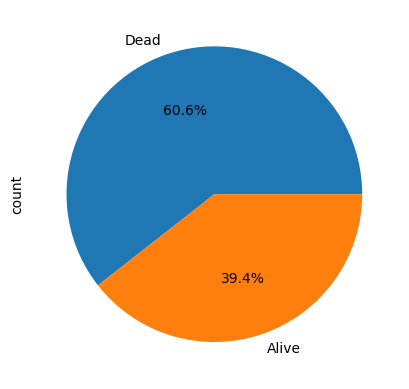

In [ ]:
data['Vital Status'].value_counts().plot(kind='pie',autopct='%1.1f%%',)

##### 60.6% died after having cancer and only 39.4% able to survive it

<Axes: xlabel='grade_grouped'>

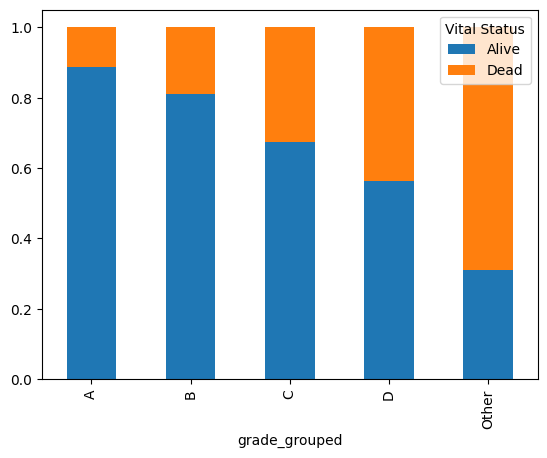

In [ ]:
pd.crosstab(data['grade_grouped'], data['Vital Status'], normalize='index').plot(kind='bar', stacked=True)


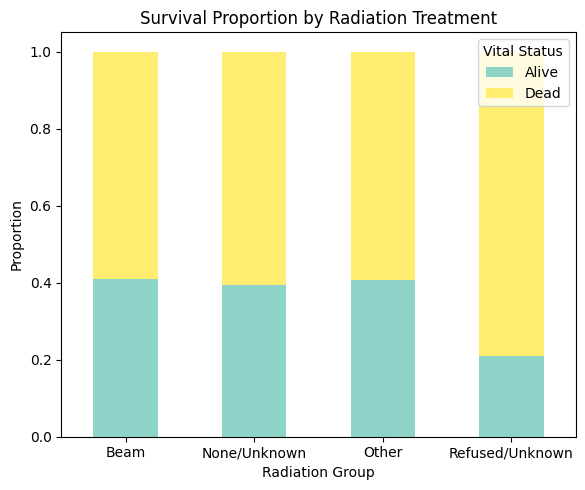

In [ ]:
pd.crosstab(data['radiation_grouped'], data['Vital Status'], normalize='index')\
  .plot(kind='bar', stacked=True, figsize=(6,5), colormap='Set3')

plt.title('Survival Proportion by Radiation Treatment')
plt.ylabel('Proportion')
plt.xlabel('Radiation Group')
plt.legend(title='Vital Status', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


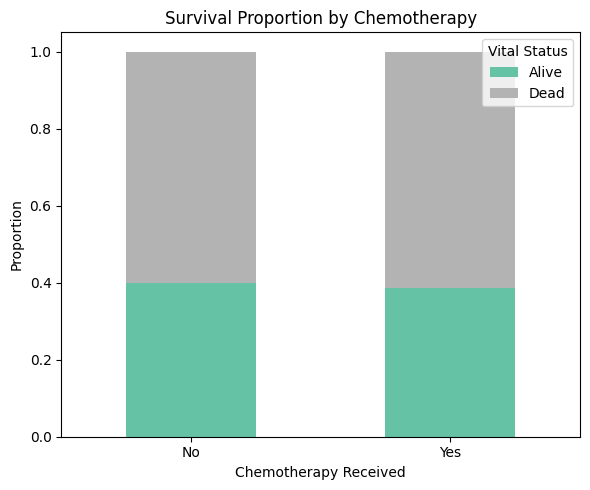

In [ ]:
pd.crosstab(data['Chemotherapy'], data['Vital Status'], normalize='index')\
  .plot(kind='bar', stacked=True, figsize=(6,5), colormap='Set2')

plt.title('Survival Proportion by Chemotherapy')
plt.ylabel('Proportion')
plt.xlabel('Chemotherapy Received')
plt.legend(title='Vital Status', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


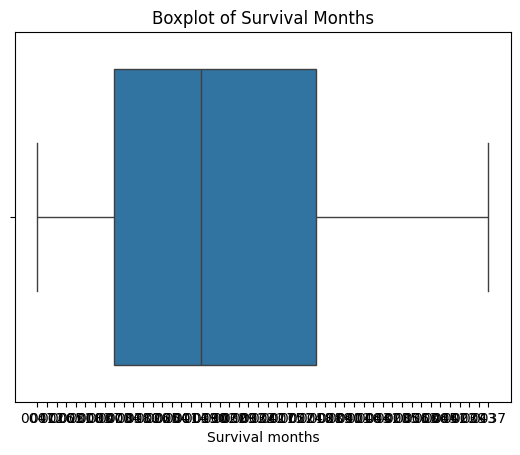

In [ ]:
sns.boxplot(x=data['Survival months'])
plt.title("Boxplot of Survival Months")
plt.show()


In [ ]:
# Map Vital Status to event
data['event'] = data['Vital Status'].map({'Dead': 1, 'Alive': 0})

# Convert Survival months to numeric
data['Survival months'] = pd.to_numeric(data['Survival months'], errors='coerce')


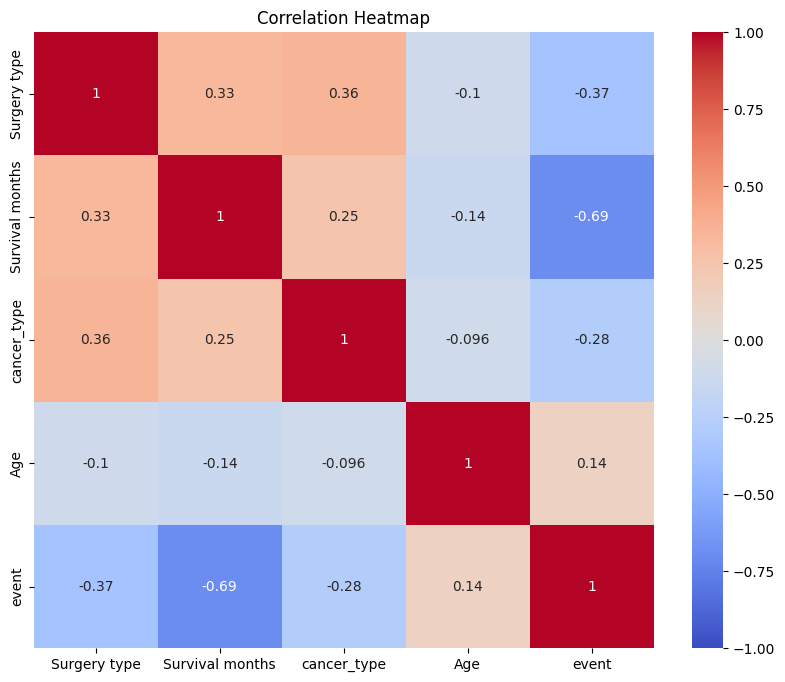

In [ ]:
columns_to_drop = ['Patient ID','age','Year of diagnosis']
data_corr = data.drop(columns=columns_to_drop, errors='ignore')
corr_matrix = data_corr.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
!pip install lifelines

### Survival Analysis

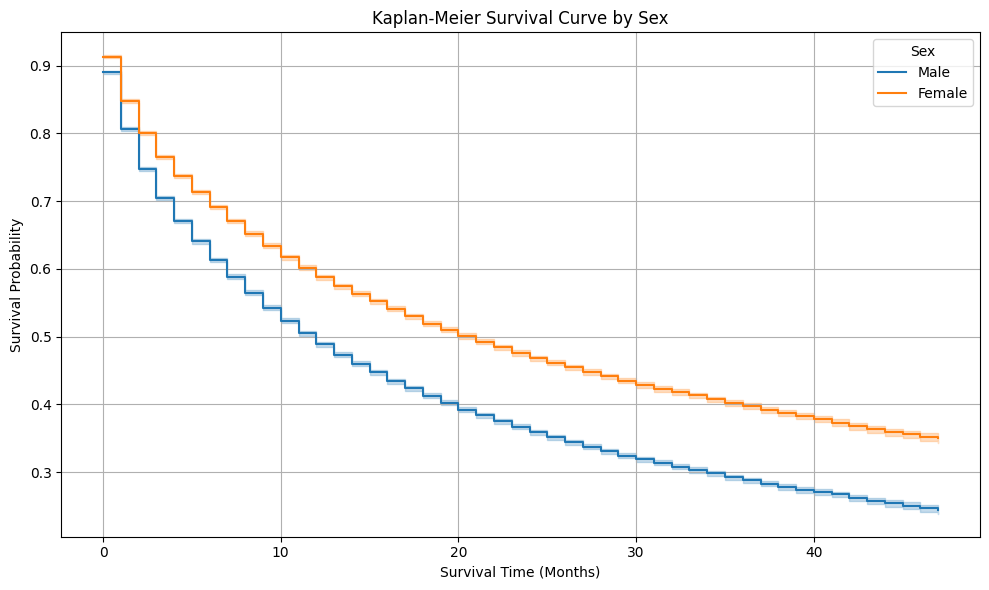

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for sex in data['Sex'].dropna().unique():
    mask = data['Sex'] == sex
    kmf.fit(data[mask]['Survival months'], data[mask]['event'], label=str(sex))
    kmf.plot_survival_function(ci_show=True)

plt.title("Kaplan-Meier Survival Curve by Sex")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Sex")
plt.tight_layout()
plt.show()




## Key Observations – Kaplan-Meier Curve by Sex

### Better Survival in Females
- At almost every time point, the orange curve (Female) lies above the blue curve (Male).
- This indicates **females have better survival outcomes** compared to males.

### Faster Drop in Male Survival
- The male survival curve drops more steeply, especially in the earlier months.
- Suggests **higher early mortality among male patients**.

### Implication
- Sex may be an important prognostic factor in survival analysis.
- Could be due to biological, behavioral, or treatment response differences between males and females.



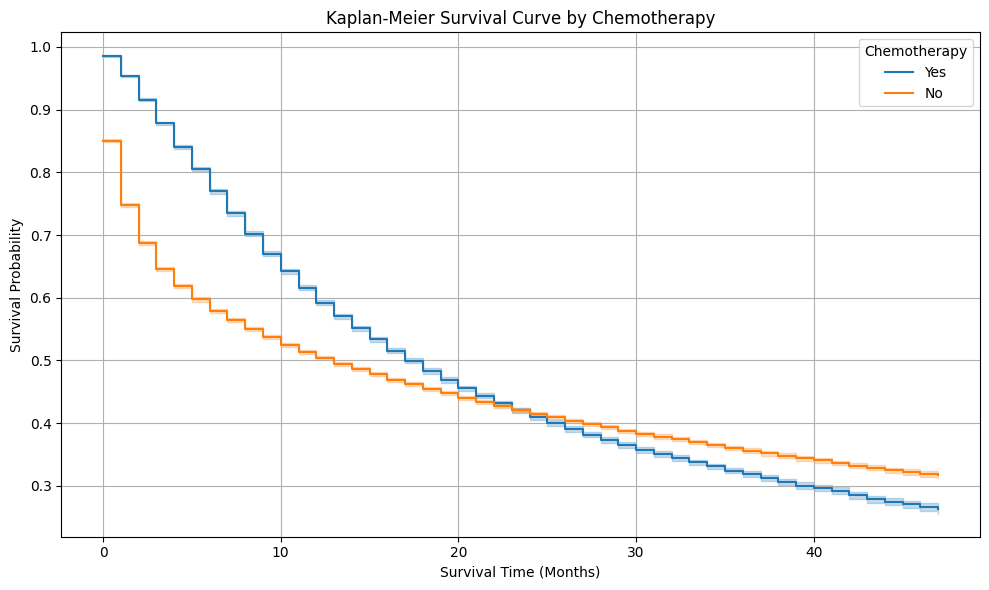

In [ ]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for chemo in data['Chemotherapy'].dropna().unique():
    mask = data['Chemotherapy'] == chemo
    kmf.fit(data[mask]['Survival months'], data[mask]['event'], label=str(chemo))
    kmf.plot_survival_function(ci_show=True)

plt.title("Kaplan-Meier Survival Curve by Chemotherapy")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Chemotherapy")
plt.tight_layout()
plt.show()




## Key Observations – Kaplan-Meier Curve by Chemotherapy

### Higher Initial Survival with Chemotherapy
- At time 0, patients who received chemotherapy start with higher survival probability (~0.98) vs ~0.85 for those who didn’t or are unknown.
- Indicates initial effectiveness of chemotherapy in improving short-term survival.

### Chemotherapy Benefits in First 10–20 Months
- The blue curve (Chemotherapy: Yes) stays consistently higher than the orange curve (No/Unknown) for the first 10–20 months.
- Suggests chemotherapy provides survival advantage in the short-to-mid-term period.

### Convergence After 25–30 Months
- After about 25–30 months, survival curves for both groups begin to converge.
- The survival advantage of chemotherapy diminishes over time.

### Possible Reversal in Long-Term
- Beyond 30 months, the No/Unknown group may even slightly outperform chemotherapy patients.
- This could reflect:
  - Long-term side effects of chemotherapy.
  - Disease recurrence in those initially treated.
  - Selection bias: sicker patients may have been more likely to receive chemotherapy.


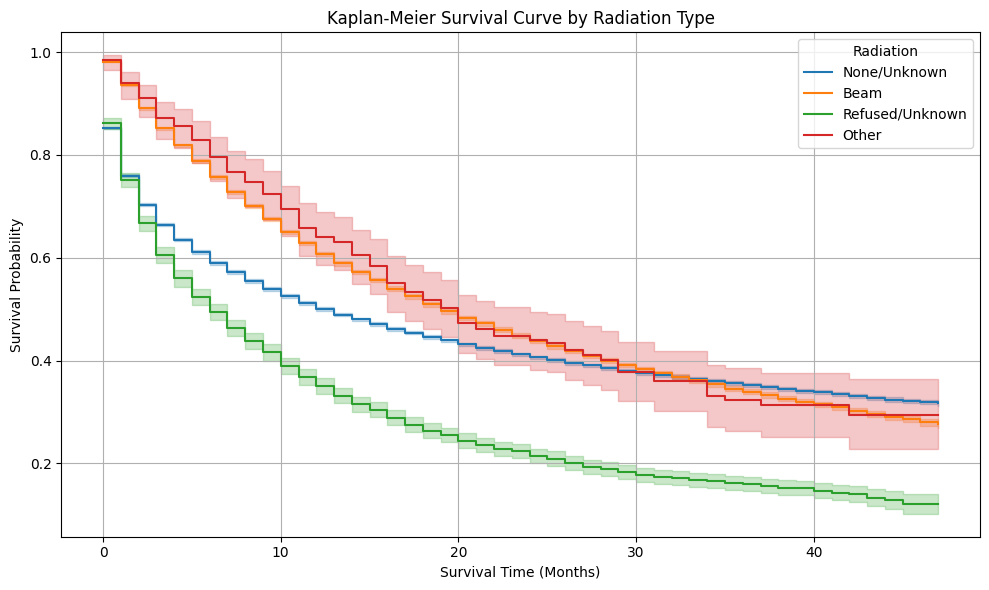

In [ ]:
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for rad in data['radiation_grouped'].dropna().unique():
    mask = data['radiation_grouped'] == rad
    kmf.fit(data[mask]['Survival months'], data[mask]['event'], label=str(rad))
    kmf.plot_survival_function(ci_show=True)

plt.title("Kaplan-Meier Survival Curve by Radiation Type")
plt.xlabel("Survival Time (Months)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.legend(title="Radiation")
plt.tight_layout()
plt.show()


##  Key Observations – Kaplan-Meier Curve by Radiation Type

###  Best Survival: “Other” Radiation (Red Line)
- Starts near 1.0 survival probability and drops slowly.
- Highest survival rate throughout the 0–45 month period.
- Indicates patients receiving “Other” radiation modalities (e.g., brachytherapy or specialized types) had better prognosis.

###  Next Best: Beam Radiation (Orange Line)
- Second-best outcome.
- Smooth and relatively high survival for the first 20–30 months.
- Common form of treatment — indicates effectiveness.

###  Intermediate: None/Unknown (Blue Line)
- Lower survival than those treated, but better than those who refused.
- Suggests that not receiving radiation or unknown status is less favorable than receiving beam or other therapies.

###  Worst Survival: Refused/Unknown (Green Line)
- Steepest drop in survival probability.
- By 12–15 months, survival drops below 0.5.
- After 30 months, survival is less than 20%.
- Patients refusing radiation possibly had worse health or late-stage cancer, or there might be psychological/social factors affecting treatment.


### Cox PH Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from lifelines import CoxPHFitter
from lifelines.utils import concordance_index
import joblib


# Replace rare Surgery types with 'Other'
surgery_counts = data['Surgery type'].value_counts()
rare_surgeries = surgery_counts[surgery_counts < 100].index
data['Surgery type'] = data['Surgery type'].replace(rare_surgeries, 'Other')

# Select features
selected_cols = [
    'Survival months', 'event', 'Sex', 'Race', 'Age','cancer_type_grouped',
    'Surgery type', 'Chemotherapy', 'radiation_grouped','grade_grouped'
]

data_model = data[selected_cols].dropna()

# One-hot encode categorical features
data_encoded = pd.get_dummies(data_model, columns=[
  'Sex', 'Race', 'Surgery type', 'Chemotherapy', 'radiation_grouped','grade_grouped','cancer_type_grouped'
], drop_first=True)


# Separate duration/event
duration_event = data_encoded[['Survival months', 'event']]
features_only = data_encoded.drop(columns=['Survival months', 'event'])

# Apply VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
features_selected = selector.fit_transform(features_only)
selected_feature_names = features_only.columns[selector.get_support()]

# Combine cleaned features + target
data_filtered = pd.concat([
    duration_event.reset_index(drop=True),
    pd.DataFrame(features_selected, columns=selected_feature_names)
], axis=1)

In [ ]:

# Train-test split
train_data, test_data = train_test_split(data_filtered, test_size=0.2, random_state=42)

#  Fit Cox model
cph = CoxPHFitter()
cph.fit(train_data, duration_col="Survival months", event_col="event")

# Summary and evaluation
cph.print_summary()
print("Concordance Index (C-index):", cph.concordance_index_)

<lifelines.CoxPHFitter: fitted with 112266 total observations, 44383 right-censored observations>
             duration col = 'Survival months'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 112266
number of events observed = 67883
   partial log-likelihood = -733200.22
         time fit was run = 2025-08-11 02:41:34 UTC

---
                                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                          
Age                                0.01      1.01      0.00            0.01            0.01                1.01                1.01
Sex_Male                           0.22      1.25      0.01            0.21            0.24                1.23                1.27
Race_Asian or Pacific Islander    -0.35      0.71      0.05           -0.44           -0.25                0.64                0.78
Race_Black                        -0.10      0.90      0.05           -0.19           -0.01                0.82                0.99
Race_White                        -0.12      0.88      0.04           -0.21           -0.03                0.81                0.97
Surgery type_21                   -1.62      0.20      0.04           -1.69           -1.54                0.19                0.21
Surgery type_22                   -2.25      0.11      0.08           -2.40           -2.10                0.09                0.12
Surgery type_30                   -1.66      0.19      0.06           -1.78           -1.55                0.17                0.21
Surgery type_33                   -1.97      0.14      0.03           -2.02           -1.92                0.13                0.15
Chemotherapy_Yes                  -0.40      0.67      0.01           -0.41           -0.38                0.66                0.68
radiation_grouped_None/Unknown     0.74      2.10      0.01            0.72            0.76                2.06                2.13
radiation_grouped_Refused/Unknown  0.62      1.86      0.02            0.58            0.66                1.79                1.94
grade_grouped_B                    0.24      1.28      0.05            0.15            0.34                1.16                1.40
grade_grouped_C                    0.58      1.78      0.05            0.49            0.67                1.63                1.96
grade_grouped_Other                0.70      2.01      0.04            0.61            0.79                1.84                2.20
cancer_type_grouped_8010           0.07      1.08      0.02            0.04            0.11                1.04                1.12
cancer_type_grouped_8041           0.43      1.54      0.01            0.40            0.46                1.49                1.58
cancer_type_grouped_8046          -0.12      0.89      0.02           -0.16           -0.08                0.85                0.92
cancer_type_grouped_8070          -0.14      0.87      0.01           -0.17           -0.11                0.85                0.89
cancer_type_grouped_8071          -0.09      0.91      0.03           -0.16           -0.02                0.85                0.98
cancer_type_grouped_8072          -0.27      0.76      0.04           -0.36           -0.18                0.70                0.83
cancer_type_grouped_8140          -0.26      0.77      0.01           -0.29           -0.24                0.75                0.79
cancer_type_grouped_8240          -1.88      0.15      0.06           -2.00           -1.76                0.14                0.17
cancer_type_grouped_8250          -1.13      0.32      0.06           -1.26           -1.01                0.28                0.36
cancer_type_grouped_8551          -0.72      0.49      0.04           -0.80           -0.65                0.45                0.52

                                   cmp to      z      

Concordance Index (C-index): 0.7491323421973894




#### High-Risk Factors (Increased Hazard of Death):
- **No or Refused Radiation Therapy**:  
  Patients who received no radiation or refused treatment had **~2x higher hazard** compared to those who did, emphasizing the critical role of radiation in survival.
- **Higher Cancer Grades**:  
  Cancer classified as Grade C or "Other" were associated with **2.1–2.5x higher risk**, indicating aggressive disease behavior.
- **Male Gender**:  
  Males had a **27% higher hazard** compared to females.
- **Older Age**:  
  Slight but consistent increase in risk per year of age.

#### Protective Factors (Improved Survival):
- **Certain Surgery Types (Type 22, 30, 33)**:  
  Associated with a **dramatic reduction in hazard** (up to ~91%), indicating strong protective effects from specific surgical interventions.
- **Chemotherapy**:  
  Reduced hazard by ~26%, suggesting clear survival benefits.
- **Asian or Pacific Islander Race**:  
  Lower hazard than other racial groups, potentially due to biological or healthcare access differences.

####  Other Notable Effects:
- **Race (Black/White)**:  
  Slightly reduced hazard compared to the reference group.
- ** Grades B & C**:  
  Both showed increased risk, with Grade C being more severe.

---




In [ ]:
np.exp(cph.params_)

,coef
covariate,
Age,1.010205
Sex_Male,1.249186
Race_Asian or Pacific Islander,0.707357
Race_Black,0.901814
Race_White,0.884648
Surgery type_21,0.198875
Surgery type_22,0.105154
Surgery type_30,0.189315
Surgery type_33,0.139333


In [ ]:
! pip install scikit-survival

### Random Survival Forest

In [ ]:
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel


features = ['Age', 'Sex', 'Chemotherapy', 'Race','cancer_type_grouped','radiation_grouped', 'Surgery type', 'grade_grouped']
df_model = data[['Survival months', 'event'] + features].dropna()

# Encode features
X = pd.get_dummies(df_model[features], drop_first=True)
y = Surv.from_dataframe("event", "Survival months", df_model)

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

#### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sklearn.metrics import make_scorer

# Define C-index scorer
def cindex_scorer(estimator, X, y):
    pred = estimator.predict(X)
    return concordance_index_censored(y["event"], y["time"], pred)[0]


rsf = RandomSurvivalForest(n_jobs=-1, random_state=42)


param_grid = {
    "n_estimators": [100],
    "min_samples_split": [5, 10],
    "min_samples_leaf": [5],
    "max_features": ["sqrt", 0.5],
    "max_depth": [None]
}

#  Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=rsf,
    param_grid=param_grid,
    cv=2,
    scoring=make_scorer(cindex_scorer, greater_is_better=True),
    verbose=2,
    n_jobs=-1
)

#  Fit
grid_search.fit(X_train, y_train)

#  Best model
best_rsf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
#  Train Random Survival Forest model
rsf = RandomSurvivalForest(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

#  Evaluate
print("Concordance Index (C-index):", rsf.score(X_test, y_test))


# Predict survival functions
surv_funcs = best_rsf.predict_survival_function(X_test)
time_points = best_rsf.unique_times_

# Expected survival time (months)
expected_survival = []
for func in surv_funcs:
    surv_probs = func(time_points)  # evaluate StepFunction
    exp_time = np.trapz(surv_probs, time_points)
    expected_survival.append(exp_time)
expected_survival = np.array(expected_survival)

# ------------------------
# Show results
# ------------------------
results_df = pd.DataFrame({

    "Expected Survival (months)": expected_survival
}, index=X_test.index)
print(results_df.head(10))

Concordance Index (C-index): 0.7523630129161364
        Expected Survival (months)
24203                    17.196691
82186                    26.918598
119564                    9.813421
19342                    24.411149
118280                    5.298244
107642                   18.278659
49343                    21.974258
98348                    12.098179
68951                    10.381021
124233                   13.205115


In [ ]:
! pip install xgbse xgboost scikit-survival


### XGBRegressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import make_scorer
from sksurv.metrics import concordance_index_censored

#  Concordance index scorer
def c_index_score(y_true, y_pred):
    return concordance_index_censored(
        y_true["event"], y_true["Survival months"], y_pred
    )[0]

# Scorer wrapper
cindex_scorer = make_scorer(c_index_score, greater_is_better=True)

valid_train = (y_train["Survival months"] > 0) & (~np.isnan(y_train["Survival months"]))
X_train_clean = X_train[valid_train]
y_train_clean = y_train[valid_train]

valid_test = (y_test["Survival months"] > 0) & (~np.isnan(y_test["Survival months"]))
X_test_clean = X_test[valid_test]
y_test_clean = y_test[valid_test]

#  Define label as only duration
y_train_label = y_train_clean["Survival months"]
y_test_label = y_test_clean["Survival months"]

#  Model
base_model = XGBRegressor(objective="survival:cox", random_state=42)

#  Hyperparameters
param_dist = {
    "n_estimators": [50, 75, 100],
    "max_depth": [2, 3, 4],
    "learning_rate": [0.03, 0.05, 0.07],
    "subsample": [0.8, 0.9, 1.0],
    "colsample_bynode": [0.8, 0.9, 1.0]
}

#  Hyperparameter tuning
search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    verbose=2,
    n_jobs=-1,
    scoring=cindex_scorer,
     random_state=42
)

# Fit the model
search.fit(X_train_clean, y_train_label)

# Predict
best_model = search.best_estimator_
preds = best_model.predict(X_test_clean)

#  Evaluate using c-index
c_index = concordance_index_censored(
    y_test_clean["event"].astype(bool),
    y_test_clean["Survival months"],
    preds
)[0]

# Results
print(" Best Parameters:", search.best_params_)
print(f" Test Concordance Index: {c_index:.4f}")


Fitting 3 folds for each of 15 candidates, totalling 45 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


 Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.03, 'colsample_bynode': 0.8}
 Test Concordance Index: 0.7136


In [ ]:
import pandas as pd
import numpy as np
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from sklearn.model_selection import train_test_split
import joblib

# Define features and dataset
features = ['Age', 'Sex','Race','cancer_type_grouped','Chemotherapy','radiation_grouped', 'Surgery type', 'grade_grouped']
df_model = data[['Survival months', 'event'] + features].dropna()

# One-hot encode all categories (do NOT drop any)
X = pd.get_dummies(df_model[features], drop_first=False)
y = Surv.from_dataframe("event", "Survival months", df_model)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# Train RSF
rsf = RandomSurvivalForest(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    max_depth=None,
    n_jobs=-1,
    random_state=42
)
rsf.fit(X_train, y_train)

# Save model
joblib.dump(rsf, "rsf_model.pkl")

# Save metadata
categorical_features = ['Sex', 'Chemotherapy','cancer_type_grouped', 'Race', 'radiation_grouped', 'Surgery type', 'grade_grouped']
categorical_options = {
    col: sorted([str(v) for v in df_model[col].dropna().unique()])
    for col in categorical_features
}

model_columns = {
    "final_features": X.columns.tolist(),
    **categorical_options
}

joblib.dump(model_columns, "model_columns.pkl")


['model_columns.pkl']